In [1]:
# import snappy
# from snappy import GPF
# from snappy import ProductIO

import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import rasterio
import tensorflow as tf

import sis_helper as helper
from sis_helper import RGBProfile as rgb

# import importlib
# importlib.reload(helper)


# TIF_FILENAME='/home/cb/sis/data/collocated/001_1018x8004.tif'
# TENSOR_FILENAME='/home/cb/sis/data/tfrecords/001_6008x9002.tfrecord'

#256px
TIF_FILENAME='/home/cb/sis2/data/tif256/001_2622x8886.tif'
TENSOR_FILENAME='/home/cb/sis2/data/tfrecords256/001_2622x8886.tfrecord'


2023-06-30 09:55:45.354905: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
raw_tiff = rasterio.open(os.path.join(TIF_FILENAME))


Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


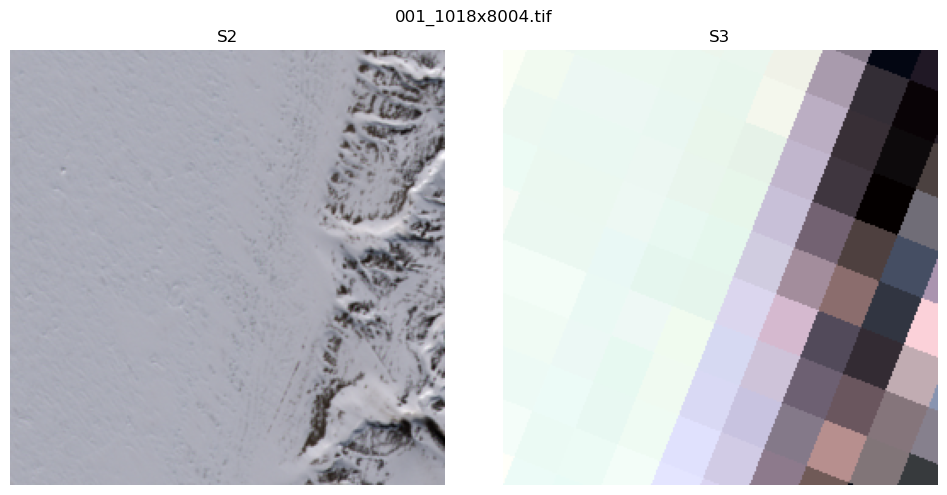

In [3]:
helper.plot_tiff_sbs(raw_tiff, title='001_1018x8004.tif')


In [5]:
helper.save_tfrecord(raw_tiff, TENSOR_FILENAME)


In [6]:
import importlib
importlib.reload(helper)

file_list = [TENSOR_FILENAME]

for sample_file in file_list:

    sample_dataset = tf.data.TFRecordDataset(sample_file)
    for element in sample_dataset:

        helper.plot_tensor_sbs(element, title='tfrecord')


2023-06-30 09:57:52.703423: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at example_parsing_ops.cc:94 : INVALID_ARGUMENT: Key: raw_s2.  Can't parse serialized Example.


InvalidArgumentError: {{function_node __wrapped__ParseExampleV2_Tdense_2_num_sparse_0_ragged_split_types_0_ragged_value_types_0_sparse_types_0_device_/job:localhost/replica:0/task:0/device:CPU:0}} Key: raw_s2.  Can't parse serialized Example. [Op:ParseExampleV2]

#### Additional tests

Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


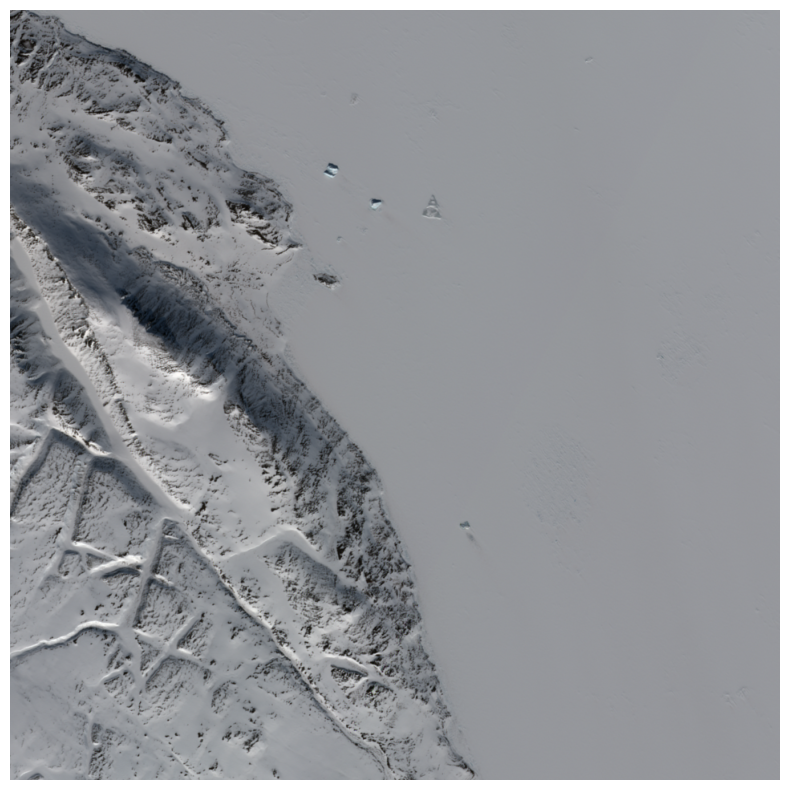

In [6]:
red_band = helper.normalize_numpy(raw_tiff.read(5))
green_band = helper.normalize_numpy(raw_tiff.read(4))
blue_band = helper.normalize_numpy(raw_tiff.read(3))

# Stack the bands to create the RGB image
# rgb_image = rasterio.plot.reshape_as_image([red_band, green_band, blue_band])
rgb_image = np.stack([red_band, green_band, blue_band], axis=-1)

# Display the RGB image
plt.figure(figsize=(10,10))
plt.imshow(rgb_image)
plt.axis('off')
plt.show()
